In [3]:
import numpy as np
import matplotlib.pyplot as plt
import thomson
import astropy.units as u

In [4]:
probe_wavelength = 526.5/2 * u.nm
epw_wavelengths =np.linspace(probe_wavelength.value - 40, probe_wavelength.value + 40, num=200) * u.nm
iaw_wavelengths =np.linspace(probe_wavelength.value - 3, probe_wavelength.value + 3, num=200) * u.nm
ve = np.linspace(-5e7, 5e7, 500)
vH = np.linspace(-2e6, 2e6, 500)
vC = np.linspace(-1e6, 1e6, 500)
n = 4e19

notch = np.array([520, 540])

In [5]:
Te = 200
TH = 200
ve0 = 5e6
vH0 = 0
pe = 3
pH = 2.5

In [6]:
alpha, iaw_Skw_old = thomson.spectral_density(
        wavelengths = iaw_wavelengths,
        probe_wavelength = probe_wavelength,
        T_e = Te * u.eV,
        T_i = TH * u.eV,
        electron_vel = np.array([[-1, 1, 0]]) * ve0 / np.sqrt(2) * u.m / u.s,
        ion_vel = np.array([[-1, 1, 0]]) * vH0 / np.sqrt(2) * u.m / u.s,
        n = n * u.cm**-3
    )

alpha, epw_Skw_old = thomson.spectral_density(
        wavelengths = epw_wavelengths,
        probe_wavelength = probe_wavelength,
        T_e = Te * u.eV,
        T_i = TH * u.eV,
        electron_vel = np.array([[-1, 1, 0]]) * ve0 / np.sqrt(2) * u.m / u.s,
        ion_vel = np.array([[-1, 1, 0]]) * vH0 / np.sqrt(2) * u.m / u.s,
        n = n * u.cm**-3
    )

alpha, iaw_Skw_new = thomson.spectral_density_supergaussian(
        wavelengths = iaw_wavelengths,
        probe_wavelength = probe_wavelength,
        T_e = Te * u.eV,
        T_i = TH * u.eV,
        electron_vel = np.array([[-1, 1, 0]]) * ve0 / np.sqrt(2) * u.m / u.s,
        ion_vel = np.array([[-1, 1, 0]]) * vH0 / np.sqrt(2) * u.m / u.s,
        p_e = [pe],
        p_i = [pH],
        n = n * u.cm**-3
    )

alpha, epw_Skw_new = thomson.spectral_density_supergaussian(
        wavelengths = epw_wavelengths,
        probe_wavelength = probe_wavelength,
        T_e = Te * u.eV,
        T_i = TH * u.eV,
        electron_vel = np.array([[-1, 1, 0]]) * ve0 / np.sqrt(2) * u.m / u.s,
        ion_vel = np.array([[-1, 1, 0]]) * vH0 / np.sqrt(2) * u.m / u.s,
        p_e = [pe],
        p_i = [pH],
        n = n * u.cm**-3
    )

(0.0, 5e-15)

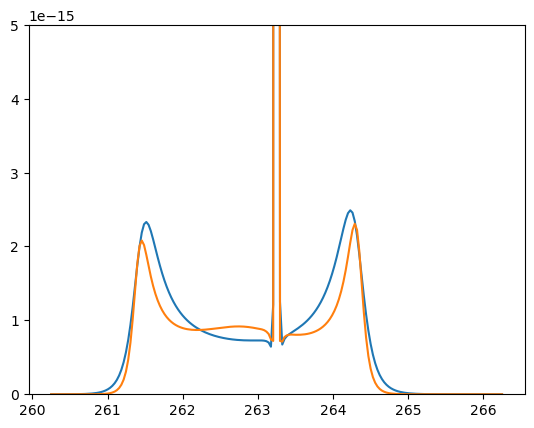

In [7]:
plt.plot(iaw_wavelengths, epw_Skw_old)
plt.plot(iaw_wavelengths, epw_Skw_new)
plt.ylim(0, 5e-15)

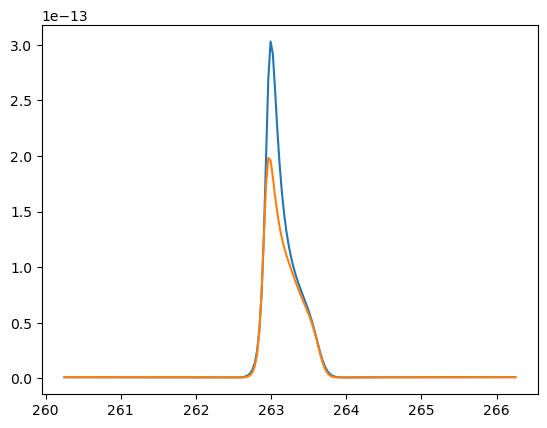

In [8]:
plt.plot(iaw_wavelengths, iaw_Skw_old)
plt.plot(iaw_wavelengths, iaw_Skw_new)